In [3]:
import numpy as np
import torch
from baukit import show
import torchvision
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [63]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_path = "flat_spectrograms" # "data/spectrograms/train"
# test_path = "mnist_4440/test"
train_set = ImageFolder(train_path)
print("Number of images in the training set =", len(train_set))

Number of images in the training set = 29315


In [64]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_path = "../flat_spectrograms1" # "data/spectrograms/train"
# test_path = "mnist_4440/test"
train_set = ImageFolder(train_path)
print("Number of images in the training set =", len(train_set))

FileNotFoundError: [Errno 2] No such file or directory: '../flat_spectrograms1'

In [8]:
list(np.load("../flat_spectrograms.zip"))

['flat_spectrograms/',
 'flat_spectrograms/Background/',
 'flat_spectrograms/Background/Cross_A_01_050520_212731_30056_2470.png',
 'flat_spectrograms/Background/Cross_A_01_050520_212731_30056_2726.png',
 'flat_spectrograms/Background/Cross_A_01_050520_212731_30056_2982.png',
 'flat_spectrograms/Background/Cross_A_01_050520_212731_30056_3238.png',
 'flat_spectrograms/Background/Cross_A_01_050520_212731_30056_3494.png',
 'flat_spectrograms/Background/Cross_A_01_050520_212731_30056_3750.png',
 'flat_spectrograms/Background/Cross_A_01_050520_212731_30056_4006.png',
 'flat_spectrograms/Background/Cross_A_01_050520_212731_30056_4262.png',
 'flat_spectrograms/Background/Cross_A_01_050520_212731_30056_4518.png',
 'flat_spectrograms/Background/Cross_A_01_050520_212731_30056_4774.png',
 'flat_spectrograms/Background/Cross_A_01_050521_004500_30057_2470.png',
 'flat_spectrograms/Background/Cross_A_01_050521_004500_30057_2726.png',
 'flat_spectrograms/Background/Cross_A_01_050521_004500_30057_2982.

In [72]:
list(np.load("../flat_spectrograms1.npz.zip"))#'arr_0'].shape
# np.load("image.npz")['arr_0'].shape
# npz = np.load("../flat_spectrograms.zip")
# help(npz)

['flat_spectrograms/',
 'flat_spectrograms/Background/',
 'flat_spectrograms/Background/Cross_A_01_050520_212731_30056_2470.png',
 'flat_spectrograms/Background/Cross_A_01_050520_212731_30056_2726.png',
 'flat_spectrograms/Background/Cross_A_01_050520_212731_30056_2982.png',
 'flat_spectrograms/Background/Cross_A_01_050520_212731_30056_3238.png',
 'flat_spectrograms/Background/Cross_A_01_050520_212731_30056_3494.png',
 'flat_spectrograms/Background/Cross_A_01_050520_212731_30056_3750.png',
 'flat_spectrograms/Background/Cross_A_01_050520_212731_30056_4006.png',
 'flat_spectrograms/Background/Cross_A_01_050520_212731_30056_4262.png',
 'flat_spectrograms/Background/Cross_A_01_050520_212731_30056_4518.png',
 'flat_spectrograms/Background/Cross_A_01_050520_212731_30056_4774.png',
 'flat_spectrograms/Background/Cross_A_01_050521_004500_30057_2470.png',
 'flat_spectrograms/Background/Cross_A_01_050521_004500_30057_2726.png',
 'flat_spectrograms/Background/Cross_A_01_050521_004500_30057_2982.

In [35]:
sorted(npz)[1]
byte_image = npz[sorted(npz)[2]]
type(byte_image)
np.fromstring(byte_image, dtype=np.uint8).shape

/var/folders/fg/rrlp0jyd0yx58b9sdy3mnbkm0000gn/T/ipykernel_25881/1484553154.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  np.fromstring(byte_image, dtype=np.uint8).shape


(24447,)

In [61]:
# type(npz[sorted(npz)[142]])
from io import BytesIO
b1 = npz[sorted(npz)[2]]
np.array(Image.open(BytesIO(b1)))#.shape
# sorted(npz)

array([[11, 25, 20, ...,  9, 10,  9],
       [ 9, 20, 17, ...,  9, 10, 10],
       [ 8, 17, 14, ...,  8, 10, 10],
       ...,
       [ 5,  7, 10, ..., 13,  9,  9],
       [12, 14, 12, ..., 13,  8,  9],
       [21, 19, 15, ..., 13,  7, 10]], dtype=uint8)

4440th item is a pair (<PIL.Image.Image image mode=RGB size=256x256 at 0x7F7931072B50>, 0)



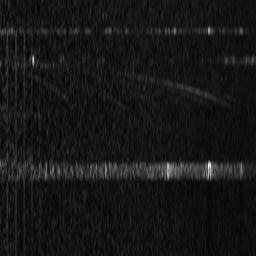

label=0 (Background)


In [3]:
idx = 4440
item = train_set[idx]
print(f"{idx}th item is a pair", item)

img, label = train_set[idx]
show(img)
print(f"{label=} ({train_set.classes[label]})")

In [4]:
from torchvision import transforms
train_set = torchvision.datasets.ImageFolder(train_path, transform=ToTensor())
# train_set = torchvision.datasets.ImageFolder(train_path, transform=transforms.Compose([transforms.Resize(256), ToTensor()]))

In [5]:
img, label = train_set[71]

# now the image is a tensor
# img.resize(3, 256, 256)

In [25]:
# [t[0].shape for t in train_set]
# set([train_set[i][0].shape for i in range(1000)])

In [6]:
train_set = torchvision.datasets.ImageFolder(train_path, transform=ToTensor())
train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=128,
    shuffle=True,
    # num_workers=16,
    pin_memory=True,
)

In [7]:
images, labels = next(train_loader.__iter__())
print(f"{images.shape=}, {labels.shape=}")

images.shape=torch.Size([128, 3, 256, 256]), labels.shape=torch.Size([128])


In [8]:
# ## Some helper functions to view network parameters
from torchinfo import summary


def view_network_shapes(model, input_shape):
    print(summary(model, input_size=input_shape))


def view_network_parameters(model):
    # Visualise the number of parameters
    tensor_list = list(model.state_dict().items())
    total_parameters = 0
    print("Model Summary\n")
    for layer_tensor_name, tensor in tensor_list:
        total_parameters += int(torch.numel(tensor))
        print("{}: {} elements".format(layer_tensor_name, torch.numel(tensor)))
    print(f"\nTotal Trainable Parameters: {total_parameters}!")

In [9]:
def mlp_classifier():
    torch.manual_seed(4440)
    layers = [
        torch.nn.Flatten(),
        torch.nn.Linear(3 * 256 * 256, 128),
        torch.nn.ReLU(),
        torch.nn.Linear(128, 10),
    ]
    return torch.nn.Sequential(*layers)


mlp = mlp_classifier().to(device)
view_network_shapes(mlp, img[None].shape)

: 

In [51]:
# training the model
def train_model(model, train_loader, loss_fn, optimizer):
    model.train()
    # Initiate a loss monitor
    train_loss = []
    correct_predictions = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        # predict the class
        predicted = model(images)
        loss = loss_fn(predicted, labels)
        correct_predictions += (predicted.argmax(dim=1) == labels).sum().item()

        # Backward pass (back propagation)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss.append(loss.item())

    return np.mean(train_loss), correct_predictions / len(train_loader.dataset)


# evaluating the model
@torch.inference_mode()  # understand what torch.inference_mode() or torch.no_grad() does
def evaluate_model(model, val_loader, loss_fn, return_confusion_matrix=False):
    model.eval()
    # Initiate a loss monitor
    val_loss = []
    correct_predictions = 0

    if return_confusion_matrix:
        confusion_matrix = torch.zeros(
            len(val_loader.dataset.classes), len(val_loader.dataset.classes)
        )

    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)
        # predict the class
        predicted = model(images)
        loss = loss_fn(predicted, labels)
        correct_predictions += (predicted.argmax(dim=1) == labels).sum().item()

        if return_confusion_matrix:
            for t, p in zip(labels.view(-1), predicted.argmax(dim=1).view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

        val_loss.append(loss.item())

    val_loss = np.mean(val_loss)
    val_acc = correct_predictions / len(val_loader.dataset)

    if return_confusion_matrix:
        return val_loss, val_acc, confusion_matrix
    else:
        return val_loss, val_acc

In [53]:
torch.manual_seed(4440)

model = mlp_classifier().to(device)
epochs = 10  # your model should be able to get > 98% validation accuracy on the first 10 epochs
####################################################################
# **Exercise 4.2.2.2**
# TODO: choose values for your hyperparameters
learning_rate = 0.005 # None
weight_decay = 0.001 # None
# TODO: choose a loss function and optimizer
loss_fn = torch.nn.CrossEntropyLoss() #None
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay) # None
####################################################################

training_losses = []
validation_losses = []

for epoch in range(epochs):
    train_loss, train_acc = train_model(model, train_loader, loss_fn, optimizer)
    training_losses.append(train_loss)
    val_loss, val_acc = evaluate_model(model, val_loader, loss_fn)
    validation_losses.append(val_loss)
    print(
        f"epoch: {epoch+1}/{epochs} | train loss={np.mean(train_loss):.4f}, {train_acc=:.4f} | val loss: {np.mean(val_loss):.4f}, {val_acc=:.4f}"
    )

RuntimeError: mat1 and mat2 shapes cannot be multiplied (128x196608 and 2352x128)